<a href="https://colab.research.google.com/github/darshan1328/ML-for-Predictive-Lead-Scoring/blob/main/Exploratory_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World")

Hello World


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
DataFrame1 = pd.read_csv("train.csv")
DataFrame1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,25,blue-collar,single,high.school,no,yes,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,40,admin.,married,high.school,no,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no
2,51,technician,married,university.degree,no,yes,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
3,37,blue-collar,married,high.school,unknown,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
4,54,housemaid,married,university.degree,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,35,admin.,married,unknown,unknown,yes,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
32946,34,blue-collar,married,unknown,no,no,yes,cellular,jul,tue,...,13,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
32947,58,admin.,married,university.degree,no,no,no,telephone,aug,fri,...,2,999,0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,no
32948,50,services,divorced,basic.4y,unknown,yes,yes,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [ ]:
DataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   job             32950 non-null  object 
 2   marital         32950 non-null  object 
 3   education       32950 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     32950 non-null  object 
 10  duration        32950 non-null  int64  
 11  campaign        32950 non-null  int64  
 12  pdays           32950 non-null  int64  
 13  previous        32950 non-null  int64  
 14  poutcome        32950 non-null  object 
 15  emp.var.rate    32950 non-null  float64
 16  cons.price.idx  32950 non-null  float64
 17  cons.conf.idx   32950 non-null 

There are two kind of attributes:
(1) Numeric: Age, previous, etc.
(2) Categorical: martial, housing, loan etc.


In [ ]:
X = DataFrame1.drop("y", axis=1)
Y = DataFrame1["y"]
X.shape, Y.shape

((32950, 20), (32950,))

In [ ]:
prev_outcome = DataFrame1[DataFrame1.poutcome!='nonexistent'].poutcome.apply(lambda x: 1 if x=='success' else 0)
print(f"Previous Outcome_Success Rate: {prev_outcome.mean()}")

Previous Outcome_Success Rate: 0.24581005586592178


This is the Success Ratio of PRevious Campaign = 0.2458


# **Analysis**

## Categorical Data Analysis



In [ ]:
# Any missing values
DataFrame1.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
categorical_attributes = X.select_dtypes(include=['object']).columns
categorical_attributes

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

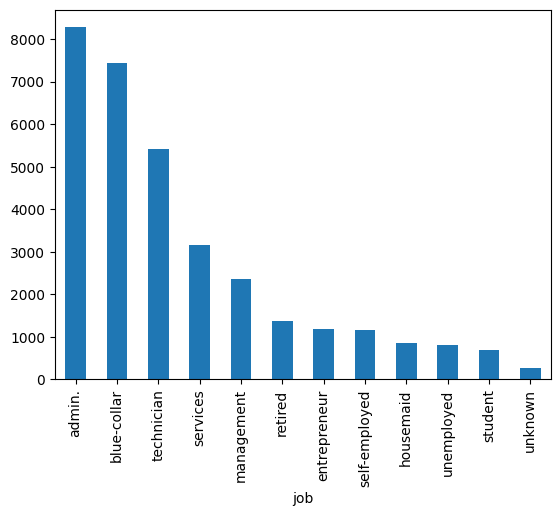

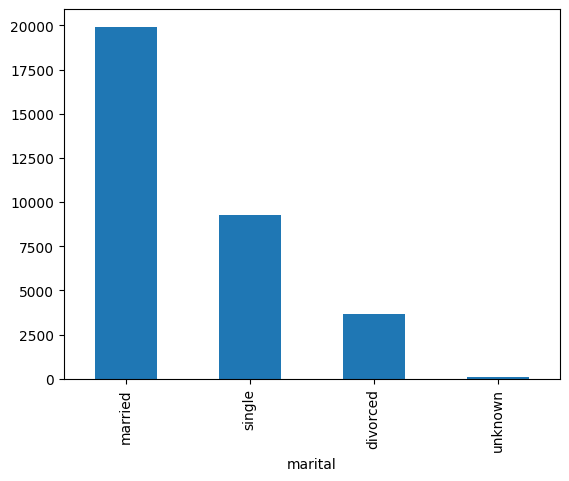

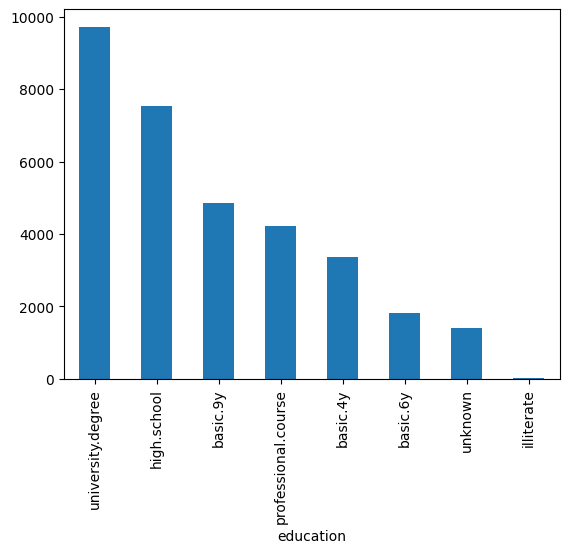

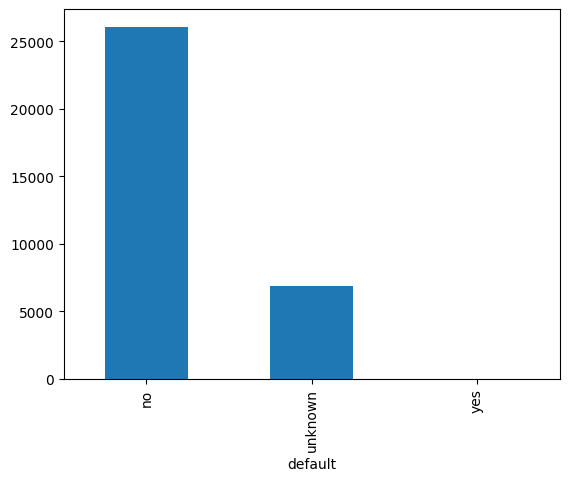

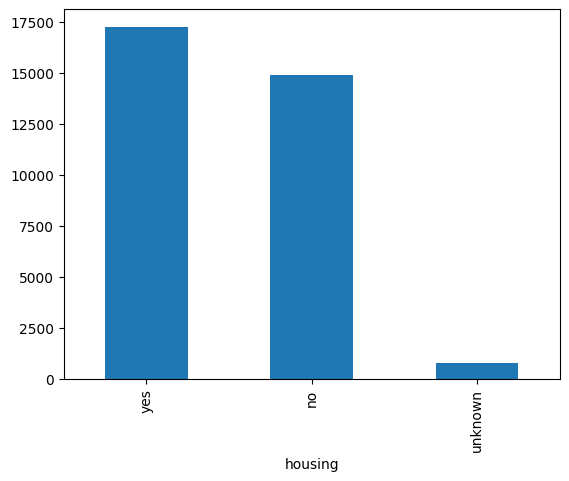

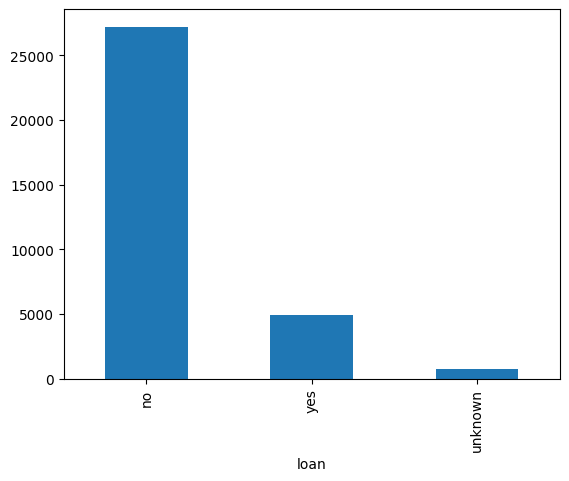

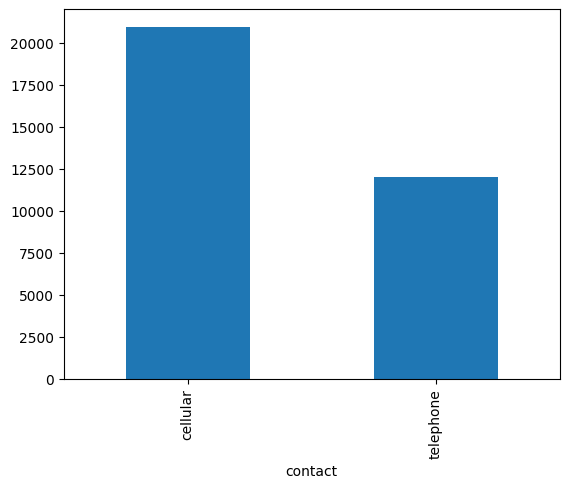

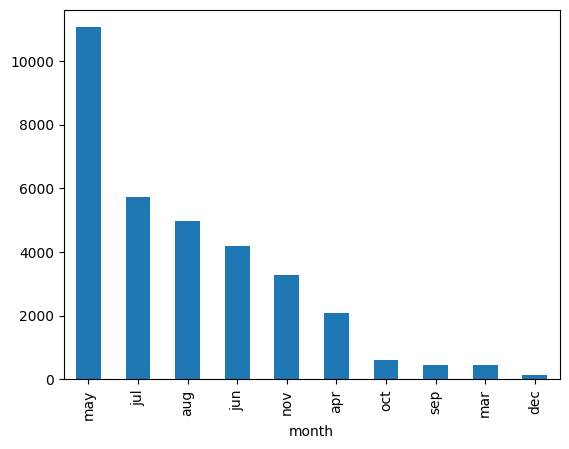

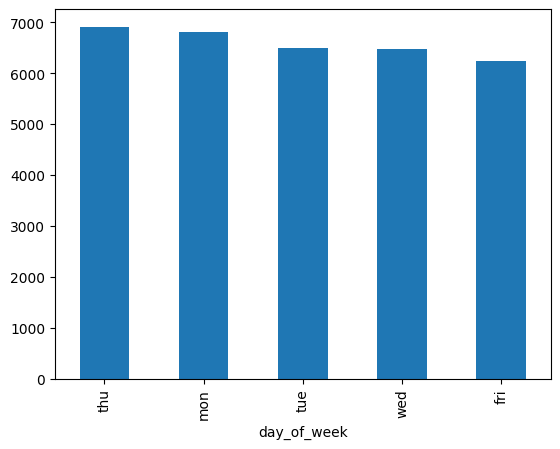

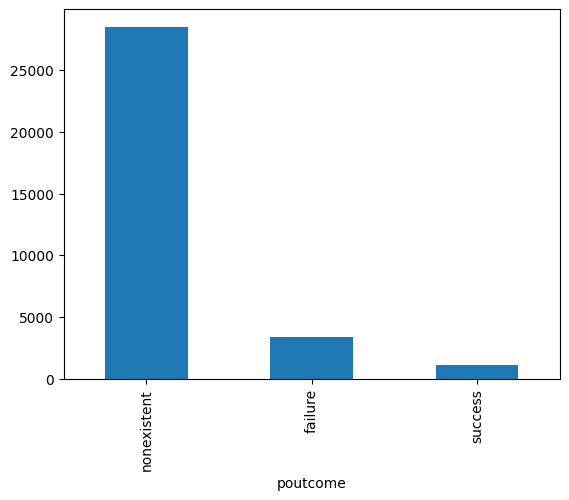

In [ ]:
import matplotlib.pyplot as plt

for attributes in categorical_attributes:
  plt.figure()
  X[attributes].value_counts().plot(kind='bar')

Some Insights I got from the above the graphs are:
1. Some customers were already contacted previously by the bank but many were never contacted at all. ("poutcome" gives this data)
2. No or very few customers who have defaulted on a loan. ("default" gives this)
3. Almost double as many cellular as landline phone calls ("contact" gives this)


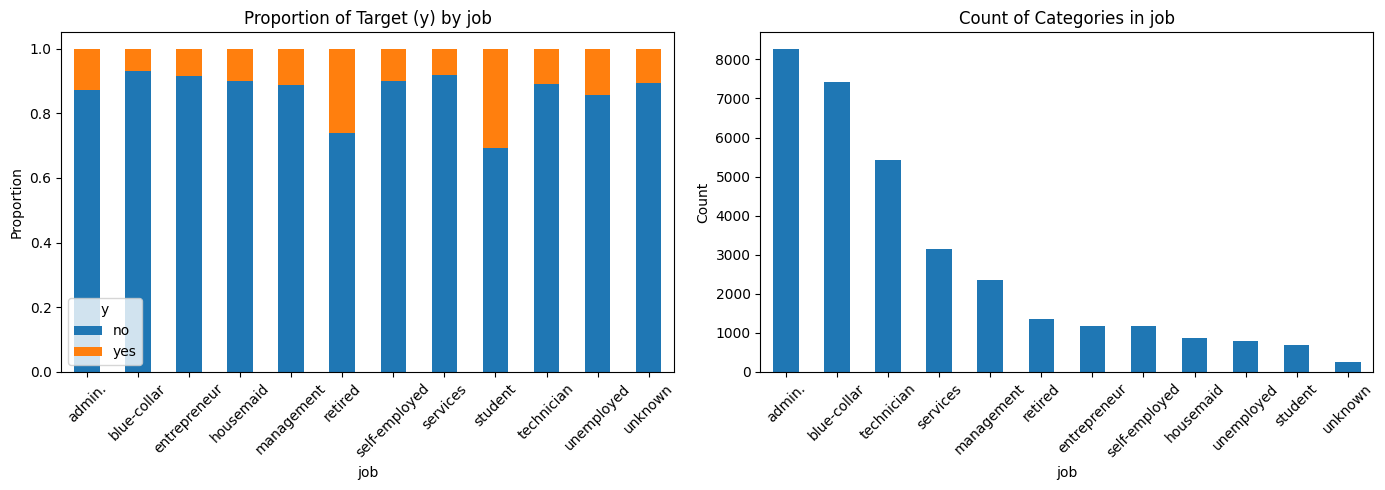

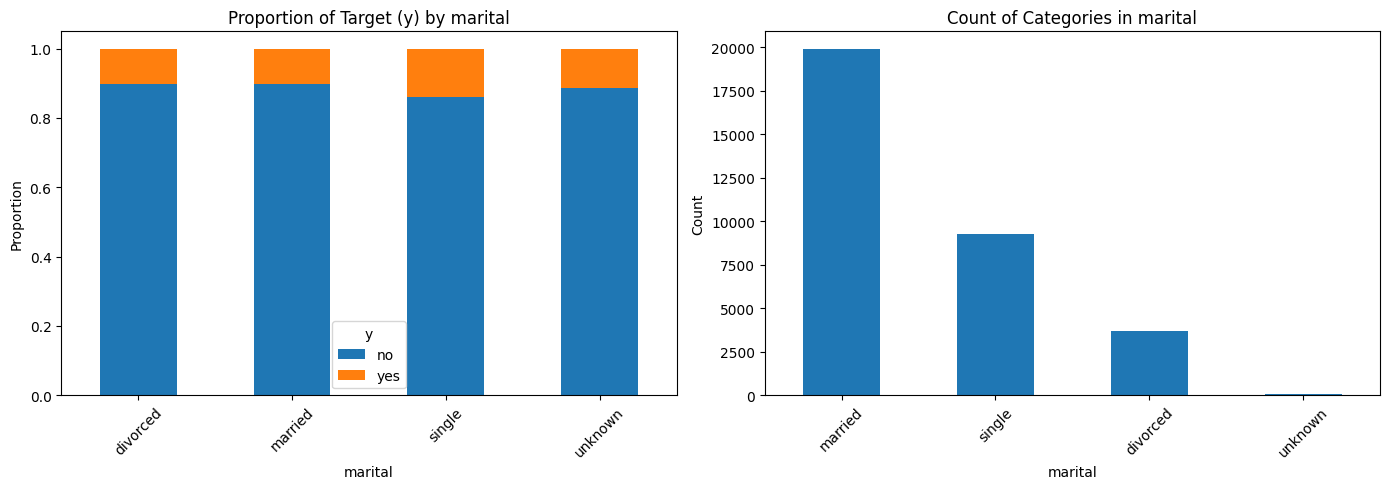

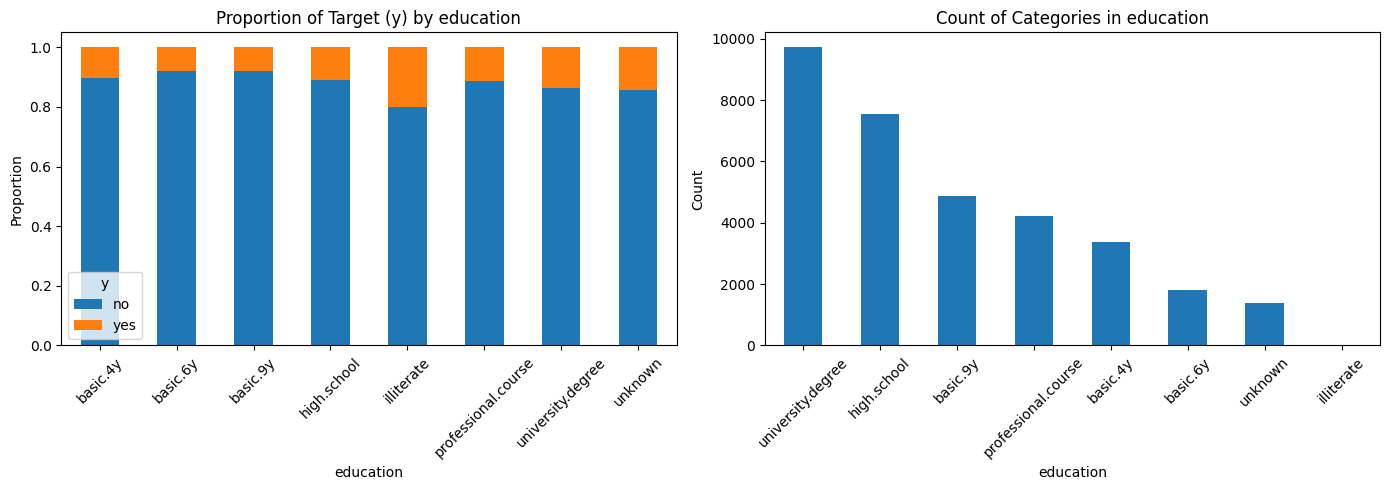

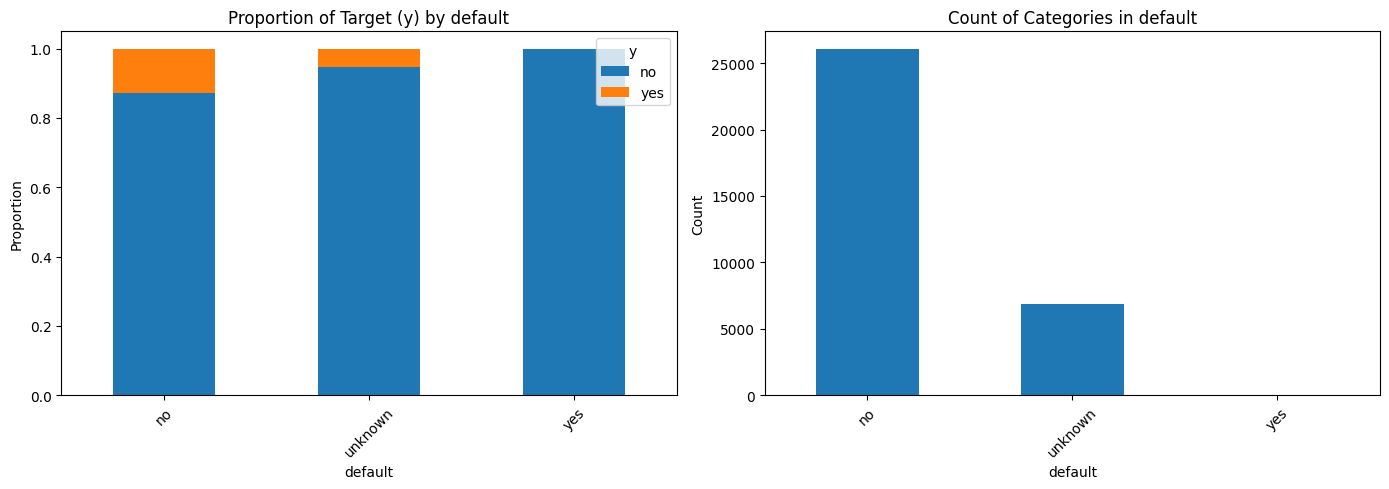

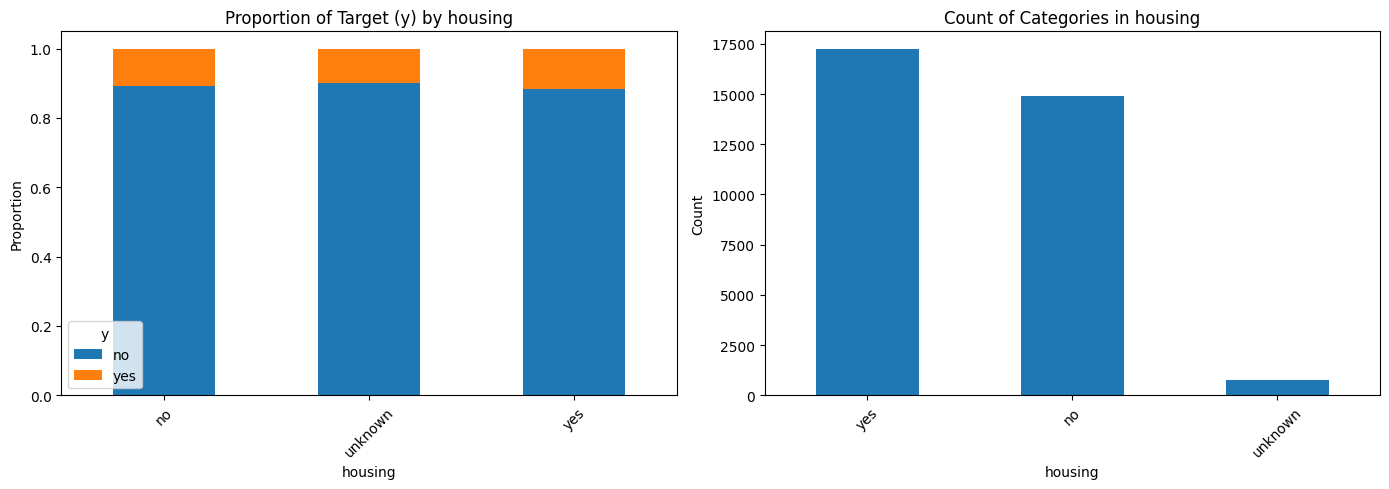

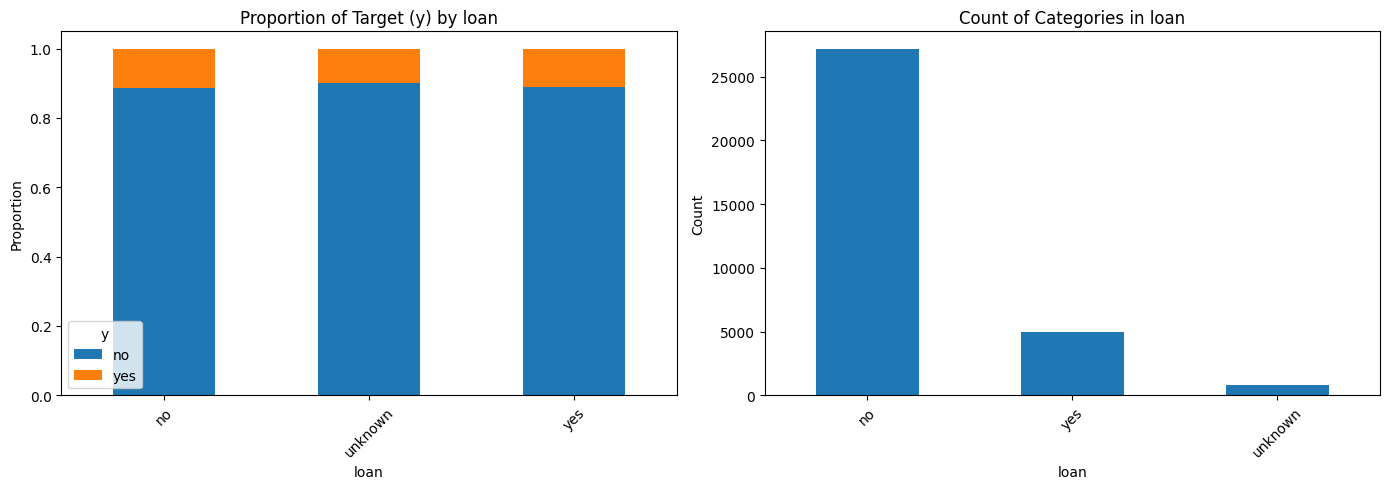

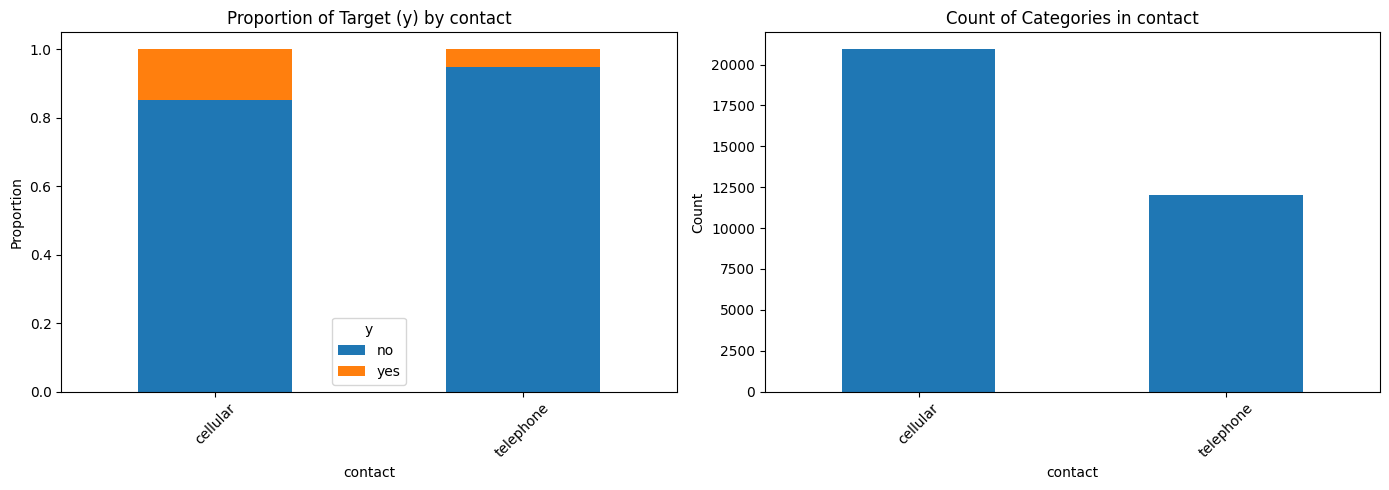

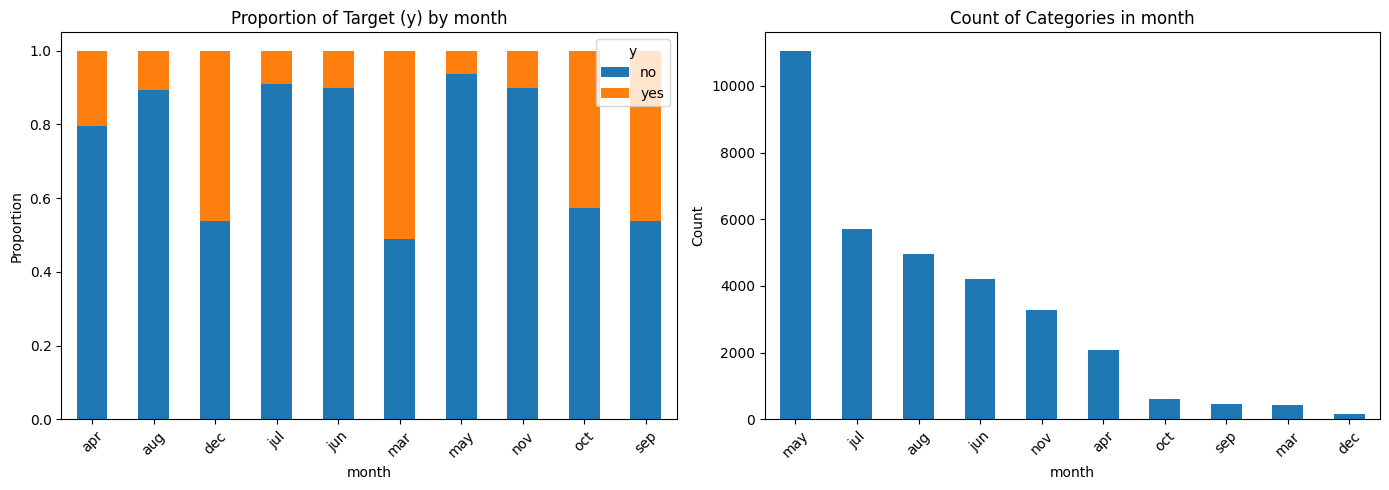

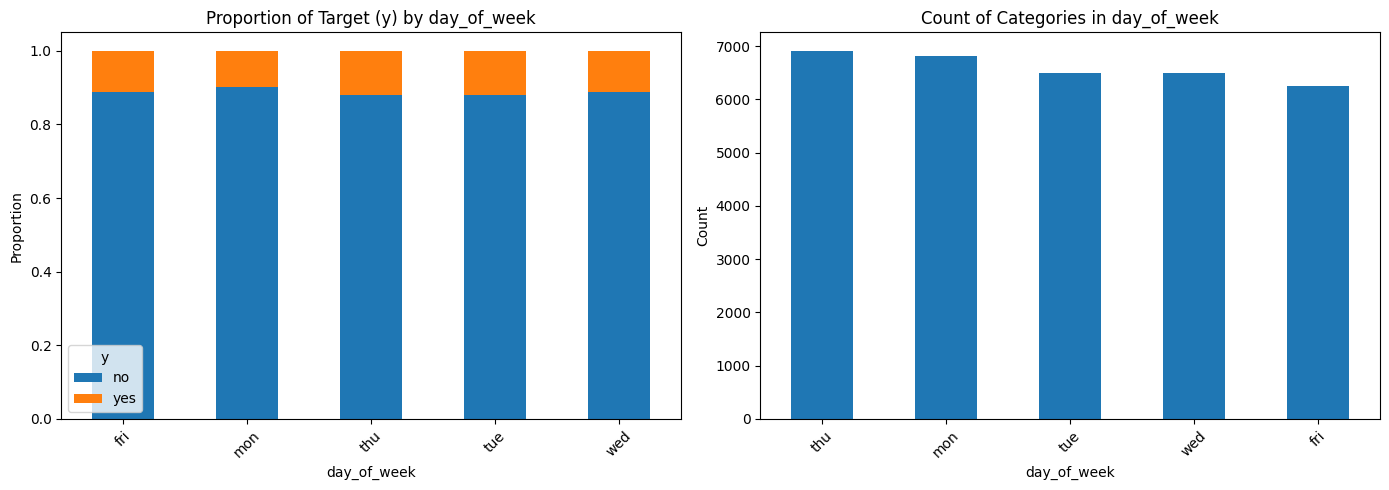

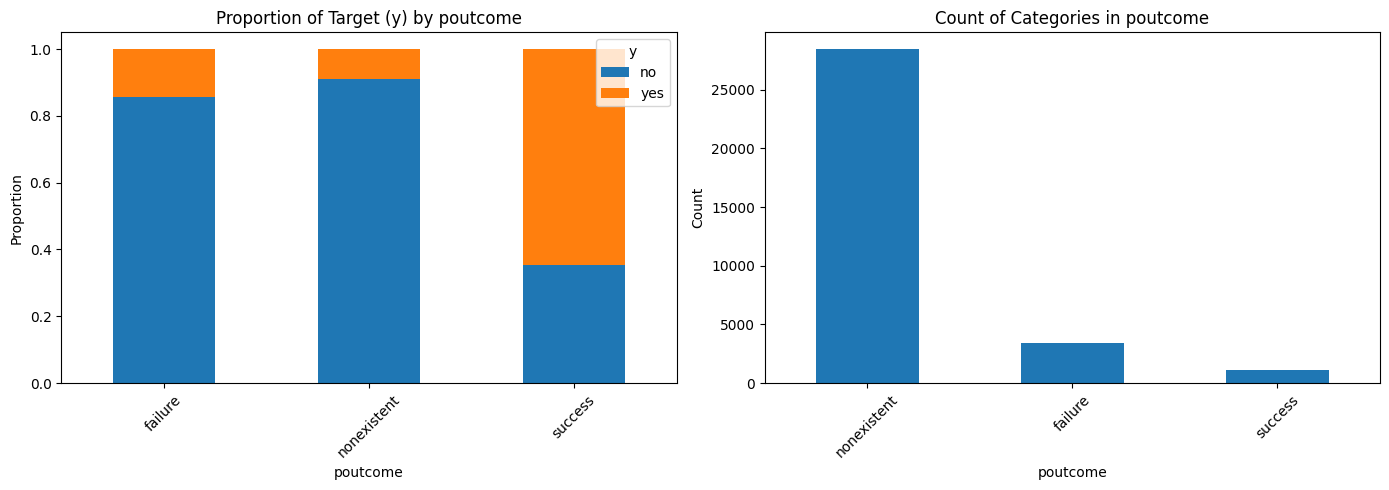

In [ ]:
for col in categorical_attributes:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Left: Proportion of y per category in the attribute
    prop = DataFrame1.groupby(col)['y'].value_counts(normalize=True).unstack()
    prop.plot(kind='bar', stacked=True, ax=axes[0], color=['#1f77b4', '#ff7f0e'])
    axes[0].set_title(f'Proportion of Target (y) by {col}')
    axes[0].set_ylabel('Proportion')
    axes[0].legend(title='y')

    # Right: Count of each category
    DataFrame1[col].value_counts().plot(kind='bar', ax=axes[1], color='#1f77b4')
    axes[1].set_title(f'Count of Categories in {col}')
    axes[1].set_ylabel('Count')

    for ax in axes:
        ax.set_xlabel(col)
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


# **Analysis of this categorical data**

(1) Large proportion of customers, who were converted in previous_campaign are more likely to say "YES" (This is from the "poutcome").

(2) marital status isn't very predictive of outcome.

(3) medium appears to have good predictive power - nearly 4x increase in conversion rate for customers who were contacted on their mobile phone (This is from "contact").

(4) Customers with admin, retired, student, and unemployed values tend to respond more. Retired, student, and unemployed have lower support.(This is from "job" attribute).

(5) day_of_week doesn't appear to be very informative

In [ ]:
numerical_attributes = X.select_dtypes(include=['int64', 'float64']).columns
numerical_attributes

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

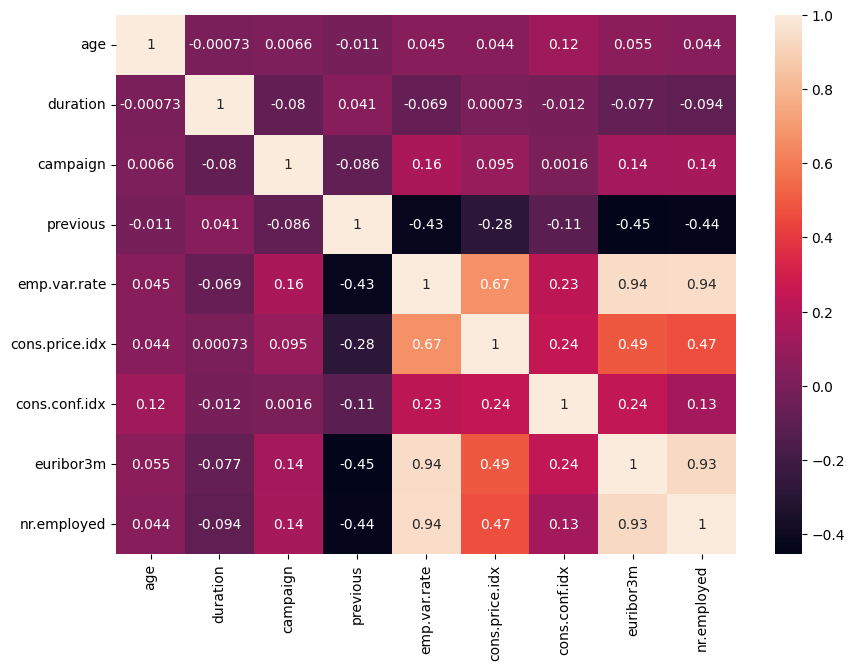

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7));
sns.heatmap(X[numerical_attributes.drop('pdays')].corr('spearman'), annot=True);

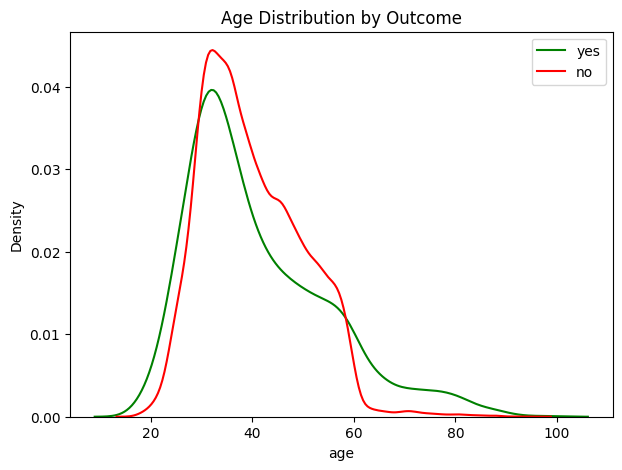

In [ ]:
numeric_outcome = pd.concat([X[numerical_attributes], Y], axis=1)
plt.figure(figsize=(7,5))
sns.distplot(numeric_outcome.loc[numeric_outcome.y == 'yes', 'age'], hist=False, color='green', label='yes');
sns.distplot(numeric_outcome.loc[numeric_outcome.y == 'no', 'age'], hist=False, color='red', label='no');
plt.legend();
plt.title('Age Distribution by Outcome');

Majority of Customers are of age: 20-50


# **Socio-Economic Factors like:**

(1) Employment variation rate - quarterly indicator (numeric)

(2) Consumer price index - monthly indicator (numeric)

(3) Consumer confidence index - monthly indicator (numeric)

(4) Euribor 3 month rate - daily indicator (numeric)

(5) Number of employees - quarterly indicator (numeric)

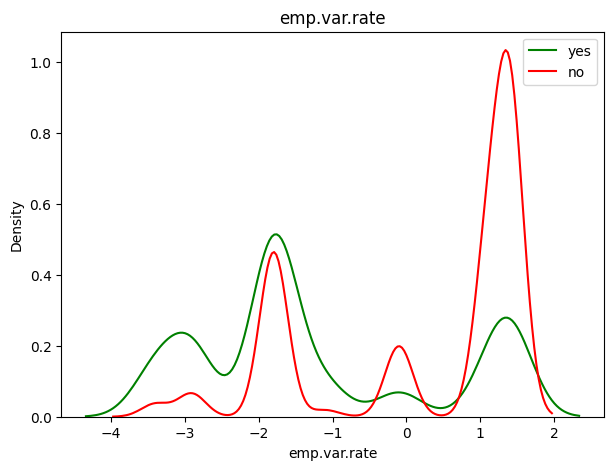

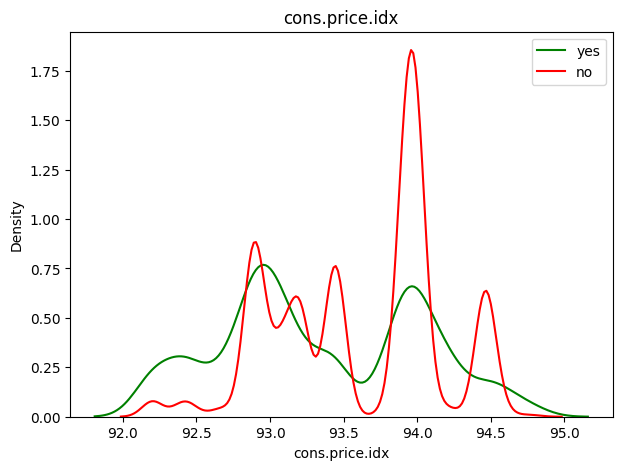

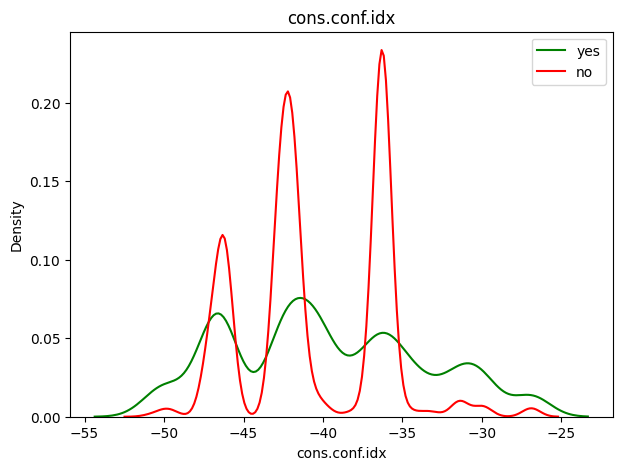

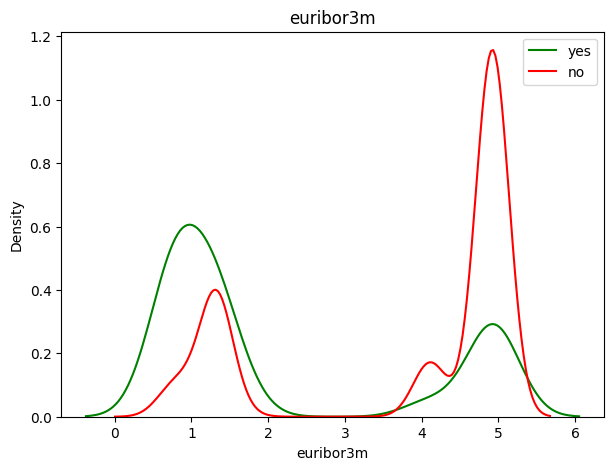

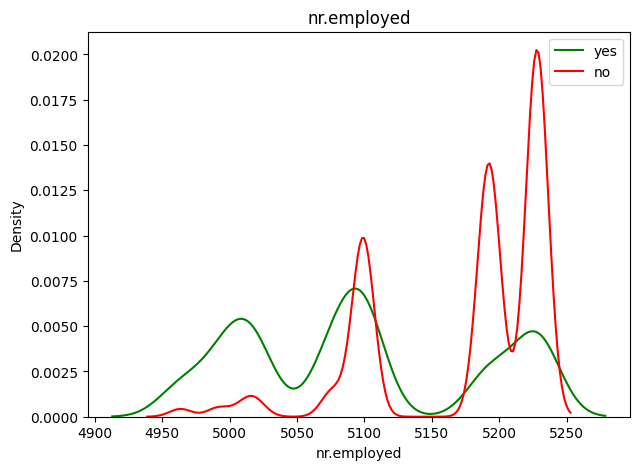

In [ ]:
socio_economic_attributes = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for attribute in socio_economic_attributes:
    numeric_outcome = pd.concat([X[numerical_attributes], Y], axis=1)
    plt.figure(figsize=(7,5))
    sns.distplot(numeric_outcome.loc[numeric_outcome.y == 'yes', attribute], hist=False, color='green', label='yes');
    sns.distplot(numeric_outcome.loc[numeric_outcome.y == 'no', attribute], hist=False, color='red', label='no');
    plt.legend();
    plt.title(attribute);

# **Insights from Socio-Economic Indicators**

(1) When euribor 3 month rate is low,(meaning cheap credit) then proportion of customers telling "YES" is high.

(2) When Consumer Price Index is low, then proportion of customers telling "YES" is high.

(3) When the *number of employees* indicator is low, then proportion of customers telling "YES" is high.

(4) When Employee Variation Rate is low, customers are likely to convert.